In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

importing Jupyter notebook from Region_data.ipynb


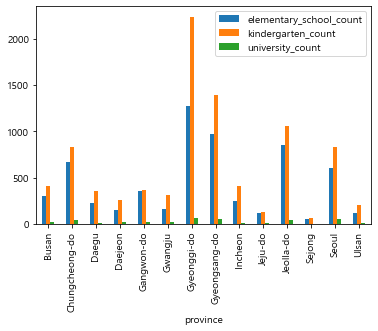

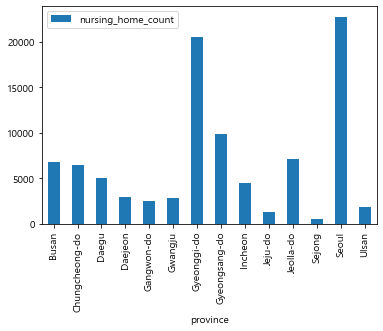

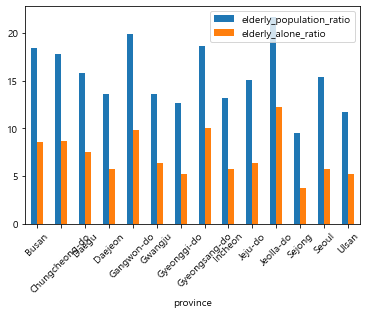

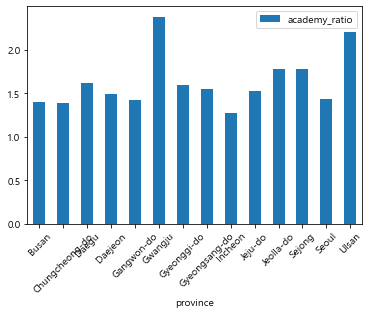

In [2]:
import import_ipynb
from Region_data import region_code

In [3]:
patient_info = pd.read_csv('data/PatientInfo.csv')

In [4]:
#patient_info = pd.read_csv(r'C:\Users\USER\Desktop\시각화 Competition\B\data\PatientInfo.csv')

In [5]:
patient_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [6]:
patient_info.info()
patient_info.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


(5165, 14)

In [7]:
#전처리 수행
patient_info.drop_duplicates(keep = False)
patient_info.shape

(5165, 14)

In [8]:
# 감염경로
patient_info.isnull().mean()

patient_id            0.000000
sex                   0.217231
age                   0.267183
country               0.000000
province              0.000000
city                  0.018199
infection_case        0.177928
infected_by           0.739400
contact_number        0.846854
symptom_onset_date    0.866409
confirmed_date        0.000581
released_date         0.692740
deceased_date         0.987222
state                 0.000000
dtype: float64

In [9]:
# NaN값을 dont know로 수정
patient_info['infection_case'].value_counts(normalize=True, dropna=False)
patient_info['infection_case'] = patient_info['infection_case'].fillna('dont know')
patient_info['infection_case'].value_counts(normalize=True, dropna=False)

contact with patient                             0.311713
dont know                                        0.177928
overseas inflow                                  0.162633
etc                                              0.136108
Itaewon Clubs                                    0.031365
Richway                                          0.024782
Guro-gu Call Center                              0.021684
Shincheonji Church                               0.020716
Coupang Logistics Center                         0.015489
Yangcheon Table Tennis Club                      0.008519
Day Care Center                                  0.008325
SMR Newly Planted Churches Group                 0.006970
Onchun Church                                    0.006389
Bonghwa Pureun Nursing Home                      0.006002
gym facility in Cheonan                          0.005808
Ministry of Oceans and Fisheries                 0.005421
Wangsung Church                                  0.004647
Cheongdo Daena

In [10]:
#성별과 나이를 밝히기 싫어서 안적었다고 추측
patient_info.query(" infection_case == 'Itaewon Clubs' ")['sex'].value_counts(normalize=True, dropna=False)

NaN       0.808642
male      0.154321
female    0.037037
Name: sex, dtype: float64

In [11]:
patient_info.query(" infection_case == 'Itaewon Clubs' ")['age'].value_counts(normalize=True, dropna=False)

NaN    0.839506
20s    0.080247
30s    0.049383
60s    0.012346
40s    0.006173
70s    0.006173
50s    0.006173
Name: age, dtype: float64

In [12]:
patient_info.query(" infection_case == 'contact with patient' ")['sex'].value_counts(normalize=True, dropna=False)

female    0.447205
male      0.359006
NaN       0.193789
Name: sex, dtype: float64

In [13]:
patient_info.query(" infection_case == 'contact with patient' ")['age'].value_counts(normalize=True, dropna=False)

NaN    0.309317
50s    0.145963
20s    0.106832
40s    0.106211
60s    0.104348
30s    0.084472
70s    0.045342
10s    0.045342
80s    0.023602
0s     0.021739
90s    0.006832
Name: age, dtype: float64

In [14]:
patient_info.query(" infection_case == 'dont know' ")['sex'].value_counts(normalize=True, dropna=False)

female    0.549510
male      0.355822
NaN       0.094668
Name: sex, dtype: float64

In [15]:
patient_info.query(" infection_case == 'dont know' ")['age'].value_counts(normalize=True, dropna=False)

20s    0.240479
50s    0.174102
60s    0.109902
NaN    0.100109
40s    0.093580
30s    0.071817
70s    0.066376
80s    0.066376
10s    0.041349
90s    0.023939
0s     0.011970
Name: age, dtype: float64

In [16]:
patient_info.query(" infection_case == 'overseas inflow' ")['sex'].value_counts(normalize=True, dropna=False)

male      0.429762
female    0.372619
NaN       0.197619
Name: sex, dtype: float64

In [17]:
patient_info.query(" infection_case == 'overseas inflow' ")['age'].value_counts(normalize=True, dropna=False)

20s    0.320238
NaN    0.222619
30s    0.184524
40s    0.080952
50s    0.067857
60s    0.054762
10s    0.044048
0s     0.016667
70s    0.007143
80s    0.001190
Name: age, dtype: float64

In [18]:
patient_info.query(" infection_case == 'etc' ")['sex'].value_counts(normalize=True, dropna=False)

female    0.470839
male      0.442390
NaN       0.086771
Name: sex, dtype: float64

In [19]:
patient_info.query(" infection_case == 'etc' ")['age'].value_counts(normalize=True, dropna=False)

20s    0.180654
50s    0.157895
60s    0.130868
40s    0.130868
30s    0.126600
NaN    0.092461
70s    0.089616
80s    0.052632
10s    0.024182
90s    0.009957
0s     0.004267
Name: age, dtype: float64

In [20]:
#성별
patient_info['sex'].value_counts(normalize=True, dropna=False)

female    0.429429
male      0.353340
NaN       0.217231
Name: sex, dtype: float64

In [21]:
# 성별을 모르면 0으로 처리
patient_info['sex'] = patient_info['sex'].fillna('0')
patient_info['sex'].value_counts(normalize=True)

female    0.429429
male      0.353340
0         0.217231
Name: sex, dtype: float64

In [22]:
#나이
patient_info['age'].value_counts(normalize=True, dropna=False)

NaN     0.267183
20s     0.174056
50s     0.129138
30s     0.101258
40s     0.100290
60s     0.093320
70s     0.044918
10s     0.034463
80s     0.032914
0s      0.012778
90s     0.009487
100s    0.000194
Name: age, dtype: float64

In [23]:
# 나이를 모르면 0으로 처리
patient_info['age'] = patient_info['age'].fillna('0')
patient_info['age'].value_counts(normalize=True)

0       0.267183
20s     0.174056
50s     0.129138
30s     0.101258
40s     0.100290
60s     0.093320
70s     0.044918
10s     0.034463
80s     0.032914
0s      0.012778
90s     0.009487
100s    0.000194
Name: age, dtype: float64

In [24]:
#감염주소지
patient_info['province'].value_counts(normalize=True, dropna=False)

Seoul                0.254017
Gyeongsangbuk-do     0.242788
Gyeonggi-do          0.233882
Incheon              0.066409
Chungcheongnam-do    0.032527
Busan                0.029235
Daegu                0.026525
Gyeongsangnam-do     0.025750
Daejeon              0.023040
Gangwon-do           0.012197
Chungcheongbuk-do    0.010842
Ulsan                0.010649
Sejong               0.009874
Gwangju              0.008519
Jeollabuk-do         0.005227
Jeollanam-do         0.004840
Jeju-do              0.003679
Name: province, dtype: float64

In [25]:
#감염주소지
patient_info['city'].value_counts(normalize=True, dropna=False)

Gyeongsan-si      0.123717
Seongnam-si       0.033495
Bucheon-si        0.031365
Gwanak-gu         0.021878
etc               0.021297
                    ...   
sankyeock-dong    0.000194
Gijang-gun        0.000194
Dalseong-gun      0.000194
Hoengseong-gun    0.000194
Yeongwol-gun      0.000194
Name: city, Length: 164, dtype: float64

In [26]:
#etc가 있어서 결측치를 etc로 처리하였음
patient_info['city'] = patient_info['city'].fillna('etc')
patient_info['city'].value_counts(normalize=True, dropna=False)

Gyeongsan-si      0.123717
etc               0.039497
Seongnam-si       0.033495
Bucheon-si        0.031365
Gwanak-gu         0.021878
                    ...   
sankyeock-dong    0.000194
Gijang-gun        0.000194
Dalseong-gun      0.000194
Hoengseong-gun    0.000194
Yeongwol-gun      0.000194
Name: city, Length: 163, dtype: float64

In [27]:
patient_info['province'].value_counts()

Seoul                1312
Gyeongsangbuk-do     1254
Gyeonggi-do          1208
Incheon               343
Chungcheongnam-do     168
Busan                 151
Daegu                 137
Gyeongsangnam-do      133
Daejeon               119
Gangwon-do             63
Chungcheongbuk-do      56
Ulsan                  55
Sejong                 51
Gwangju                44
Jeollabuk-do           27
Jeollanam-do           25
Jeju-do                19
Name: province, dtype: int64

In [28]:
patient_info.loc[patient_info['province']=="Chungcheongbuk-do", "province"]="Chungcheong-do"
patient_info.loc[patient_info['province']=="Chungcheongnam-do", "province"]="Chungcheong-do"
patient_info.loc[patient_info['province']=="Gyeongsangbuk-do", "province"]="Gyeongsang-do"
patient_info.loc[patient_info['province']=="Gyeongsangnam-do", "province"]="Gyeongsang-do"
patient_info.loc[patient_info['province']=="Jeollabuk-do", "province"]="Jeolla-do"
patient_info.loc[patient_info['province']=="Jeollanam-do", "province"]="Jeolla-do"

# 연령대 구분

In [29]:
patient_info.insert(3, 'age_level', patient_info['age'])

In [30]:
# 연령대 구분 : 1. 미성년자 (~ 20) 2. 청년 (20 ~ 60) 3. 노인(60 ~)
patient_info.loc[patient_info['age']=='0s', 'age_level'] = '1'
patient_info.loc[patient_info['age']=='10s', 'age_level'] = '1'
patient_info.loc[patient_info['age']=='20s', 'age_level'] = '2'
patient_info.loc[patient_info['age']=='30s', 'age_level'] = '2'
patient_info.loc[patient_info['age']=='40s', 'age_level'] = '3'
patient_info.loc[patient_info['age']=='50s', 'age_level'] = '3'
patient_info.loc[patient_info['age']=='60s', 'age_level'] = '4'
patient_info.loc[patient_info['age']=='70s', 'age_level'] = '4'
patient_info.loc[patient_info['age']=='80s', 'age_level'] = '5'
patient_info.loc[patient_info['age']=='90s', 'age_level'] = '5'
patient_info.loc[patient_info['age']=='100s', 'age_level'] = '5'

# 나이 결측값 중 감염경로가 Itaewon Clubs인 사람은 청년으로 처리
patient_info.loc[patient_info['infection_case']=='Itaewon Clubs', 'age_level'] = '2'

# age_level의 타입을 int로 변경
patient_info = patient_info.astype({'age_level':'int'})
patient_info

,patient_id,sex,age,age_level,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,3,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,2,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,3,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,2,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,2,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,2,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,0,0,0,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,0,0,0,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,0,0,0,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [31]:
# age_level이 0인 사람은 삭제
patient_info = patient_info[patient_info['age_level'] != 0]
patient_info

,patient_id,sex,age,age_level,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,3,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,2,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,3,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,2,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,2,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,7000000011,male,30s,2,Korea,Jeju-do,Jeju-do,contact with patient,7000000009,5,NaN,2020-04-03,2020-05-19,NaN,released
5157,7000000012,female,20s,2,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
5158,7000000013,female,10s,1,China,Jeju-do,Jeju-do,overseas inflow,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released
5159,7000000014,female,30s,2,Korea,Jeju-do,Jeju-do,Itaewon Clubs,NaN,140,NaN,2020-05-09,2020-06-12,NaN,released


In [32]:
patient_info.sort_values('age_level')

,patient_id,sex,age,age_level,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
4801,6016000023,male,10s,1,Korea,Gyeongsang-do,Yecheon-gun,contact with patient,6016000009,NaN,NaN,2020-04-13,NaN,NaN,isolated
3892,6001000135,female,10s,1,Korea,Gyeongsang-do,Gyeongsan-si,dont know,NaN,NaN,NaN,2020-02-29,2020-04-05,NaN,released
4808,6016000030,female,10s,1,Korea,Gyeongsang-do,Yecheon-gun,dont know,NaN,NaN,NaN,2020-04-14,NaN,NaN,isolated
4810,6016000032,female,0s,1,Korea,Gyeongsang-do,Yecheon-gun,contact with patient,6016000028,NaN,NaN,2020-04-15,NaN,NaN,isolated
3881,6001000124,male,10s,1,Korea,Gyeongsang-do,Gyeongsan-si,dont know,NaN,NaN,NaN,2020-02-28,2020-04-01,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,6001000419,female,80s,5,Korea,Gyeongsang-do,Gyeongsan-si,Gyeongsan Jeil Silver Town,NaN,NaN,NaN,2020-03-06,2020-03-31,NaN,released
4187,6001000430,female,80s,5,Korea,Gyeongsang-do,Gyeongsan-si,dont know,NaN,NaN,NaN,2020-03-06,2020-03-17,NaN,released
4191,6001000434,male,80s,5,Korea,Gyeongsang-do,Gyeongsan-si,dont know,NaN,NaN,NaN,2020-03-06,2020-03-28,NaN,released
4802,6016000024,male,80s,5,Korea,Gyeongsang-do,Yecheon-gun,contact with patient,6016000015,NaN,NaN,2020-04-13,NaN,NaN,isolated


In [33]:
# age_level 1
patients_1 = patient_info[patient_info['age_level'] == 1]
patients_1

,patient_id,sex,age,age_level,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
78,1000000079,female,10s,1,Korea,Seoul,Nowon-gu,Seongdong-gu APT,NaN,NaN,2020-02-20,2020-02-28,NaN,NaN,released
86,1000000087,male,10s,1,Korea,Seoul,Nowon-gu,Seongdong-gu APT,NaN,NaN,2020-02-24,2020-02-28,NaN,NaN,released
100,1000000101,female,10s,1,Korea,Seoul,Jungnang-gu,contact with patient,NaN,NaN,NaN,2020-03-04,NaN,NaN,released
103,1000000104,female,10s,1,Korea,Seoul,Gangbuk-gu,etc,NaN,NaN,NaN,2020-03-05,NaN,NaN,released
111,1000000112,female,0s,1,Korea,Seoul,Gwanak-gu,contact with patient,NaN,NaN,NaN,2020-03-07,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,6100000110,male,0s,1,Korea,Gyeongsang-do,Changwon-si,etc,NaN,NaN,2020-04-03,2020-04-05,NaN,NaN,released
5126,6100000114,female,0s,1,Korea,Gyeongsang-do,Jinju-si,overseas inflow,6100000103,NaN,2020-04-01,2020-04-08,NaN,NaN,released
5138,6100000126,female,10s,1,Korea,Gyeongsang-do,Yangsan-si,etc,NaN,NaN,NaN,2020-06-09,NaN,NaN,isolated
5153,7000000008,female,10s,1,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-03-27,2020-04-12,NaN,released


In [34]:
# age_level 2
patients_2 = patient_info[patient_info['age_level'] == 2]
patients_2

,patient_id,sex,age,age_level,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1,1000000002,male,30s,2,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
3,1000000004,male,20s,2,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,2,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
6,1000000007,male,20s,2,Korea,Seoul,Jongno-gu,contact with patient,1000000003,0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,male,20s,2,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-02,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,7000000010,female,20s,2,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
5156,7000000011,male,30s,2,Korea,Jeju-do,Jeju-do,contact with patient,7000000009,5,NaN,2020-04-03,2020-05-19,NaN,released
5157,7000000012,female,20s,2,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
5159,7000000014,female,30s,2,Korea,Jeju-do,Jeju-do,Itaewon Clubs,NaN,140,NaN,2020-05-09,2020-06-12,NaN,released


In [35]:
# age_level 3
patients_3 = patient_info[patient_info['age_level'] == 3]
patients_3

,patient_id,sex,age,age_level,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,3,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
2,1000000003,male,50s,3,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
5,1000000006,female,50s,3,Korea,Seoul,Jongno-gu,contact with patient,1000000003,43,NaN,2020-01-31,2020-02-19,NaN,released
10,1000000011,female,50s,3,China,Seoul,Seodaemun-gu,overseas inflow,NaN,23,NaN,2020-02-06,2020-02-29,NaN,released
22,1000000023,male,50s,3,Korea,Seoul,Seocho-gu,Shincheonji Church,NaN,NaN,NaN,2020-02-21,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5140,6100000128,male,40s,3,Korea,Gyeongsang-do,Geoje-si,overseas inflow,NaN,NaN,NaN,2020-06-14,NaN,NaN,released
5141,6100000129,male,40s,3,Korea,Gyeongsang-do,Geoje-si,overseas inflow,NaN,NaN,NaN,2020-06-14,NaN,NaN,isolated
5143,6100000131,male,40s,3,Korea,Gyeongsang-do,Geoje-si,overseas inflow,NaN,NaN,NaN,2020-06-15,NaN,NaN,isolated
5148,7000000003,female,40s,3,Korea,Jeju-do,etc,etc,NaN,21,NaN,2020-03-02,2020-03-15,NaN,released


In [36]:
# age_level 4
patients_4 = patient_info[patient_info['age_level'] == 4]
patients_4

,patient_id,sex,age,age_level,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
9,1000000010,female,60s,4,Korea,Seoul,Seongbuk-gu,contact with patient,1000000003,6,NaN,2020-02-05,2020-02-29,NaN,released
13,1000000014,female,60s,4,Korea,Seoul,Jongno-gu,contact with patient,1000000013,27,2020-02-06,2020-02-16,2020-03-12,NaN,released
14,1000000015,male,70s,4,Korea,Seoul,Seongdong-gu,Seongdong-gu APT,NaN,8,2020-02-11,2020-02-19,NaN,NaN,released
15,1000000016,male,70s,4,Korea,Seoul,Jongno-gu,contact with patient,1000000017,NaN,NaN,2020-02-19,2020-03-11,NaN,released
16,1000000017,male,70s,4,Korea,Seoul,Jongno-gu,contact with patient,1000000003,NaN,NaN,2020-02-20,2020-03-01,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,6100000100,female,60s,4,Korea,Gyeongsang-do,Jinju-si,etc,6100000097,NaN,2020-03-28,2020-03-31,NaN,NaN,released
5116,6100000104,female,70s,4,Korea,Gyeongsang-do,Sancheong-gun,etc,6100000097,NaN,2020-03-26,2020-03-31,NaN,NaN,released
5124,6100000112,male,60s,4,Korea,Gyeongsang-do,Hapcheon-gun,contact with patient,6100000100,NaN,2020-04-03,2020-04-07,NaN,NaN,released
5128,6100000116,male,60s,4,Korea,Gyeongsang-do,Changwon-si,etc,NaN,NaN,2020-04-20,2020-04-21,2020-05-15,NaN,released


In [37]:
# age_level 5
patients_5 = patient_info[patient_info['age_level'] == 5]
patients_5

,patient_id,sex,age,age_level,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
12,1000000013,male,80s,5,Korea,Seoul,Jongno-gu,contact with patient,1000000017,117,NaN,2020-02-16,NaN,NaN,deceased
20,1000000021,male,80s,5,Korea,Seoul,Jongno-gu,contact with patient,1000000016,NaN,NaN,2020-02-20,2020-03-08,NaN,released
53,1000000054,female,80s,5,Korea,Seoul,Eunpyeong-gu,Eunpyeong St. Mary's Hospital,NaN,NaN,NaN,2020-02-27,NaN,NaN,released
59,1000000060,male,80s,5,Korea,Seoul,Eunpyeong-gu,Eunpyeong St. Mary's Hospital,1000000054,NaN,2020-02-23,2020-02-28,NaN,NaN,released
108,1000000109,male,90s,5,Korea,Seoul,etc,contact with patient,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6020000031,female,80s,5,Korea,Gyeongsang-do,Cheongdo-gun,dont know,NaN,NaN,NaN,2020-03-06,NaN,NaN,released
4895,6020000032,female,80s,5,Korea,Gyeongsang-do,Cheongdo-gun,dont know,NaN,NaN,NaN,2020-03-07,NaN,NaN,released
4897,6020000034,female,80s,5,Korea,Gyeongsang-do,Cheongdo-gun,dont know,NaN,NaN,NaN,2020-03-09,NaN,NaN,released
4899,6020000036,female,90s,5,Korea,Gyeongsang-do,Cheongdo-gun,dont know,NaN,NaN,NaN,2020-03-13,NaN,NaN,released


# 시각화

In [38]:
# 환자 수
def patients(*dfs):
    return [df['patient_id'].count() for df in dfs]

In [39]:
# 사망 환자 수
def deceased(*dfs):
    return [df['deceased_date'].count() for df in dfs]

In [40]:
# 격리 해제 환자 수
def released(*dfs):
    return [df['released_date'].count() for df in dfs]

In [41]:
# 사망 비율
def deceased_ratio(*dfs):
    return [df['deceased_date'].count() / df['patient_id'].count() for df in dfs]

In [42]:
# 격리 해제 비율
def released_ratio(*dfs):
    return [df['released_date'].count() / df['patient_id'].count() for df in dfs]

In [43]:
# 출력
def print_plt(x, y, title):
    for i in range(len(x)):
        print(x[i], title, ':', y[i])

## 성별

In [44]:
# 성별
sex = ['여성', '남성']
patients_f = patient_info[patient_info['sex'] == 'female']
patients_m = patient_info[patient_info['sex'] == 'male']

여성 환자 수 : 2069
남성 환자 수 : 1718


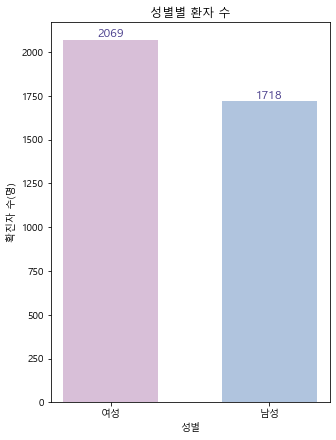

In [45]:
# 성별별 환자 수
patients_sex = patients(patients_f, patients_m)
print_plt(sex, patients_sex, '환자 수')

# 시각화
plt.figure(figsize = (5, 7))

plt.bar(sex, patients_sex, width=0.6, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(sex):
    plt.text(v, patients_sex[i], patients_sex[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('성별')
plt.ylabel('확진자 수(명)')
plt.title('성별별 환자 수')

plt.show()

여성 사망 환자 수 : 26
남성 사망 환자 수 : 40


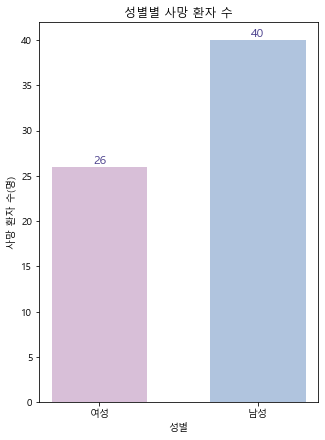

In [46]:
# 성별별 사망 환자 수
deceased_sex = deceased(patients_f, patients_m)
print_plt(sex, deceased_sex, '사망 환자 수')

# 시각화
plt.figure(figsize = (5, 7))

plt.bar(sex, deceased_sex, width=0.6, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(sex):
    plt.text(v, deceased_sex[i], deceased_sex[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('성별')
plt.ylabel('사망 환자 수(명)')
plt.title('성별별 사망 환자 수')

plt.show()

여성 격리 해제 환자 수 : 905
남성 격리 해제 환자 수 : 672


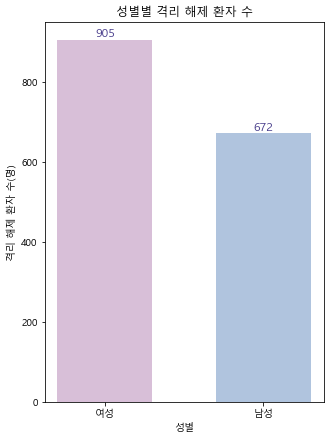

In [47]:
# 성별별 격리 해제 환자 수
released_sex = released(patients_f, patients_m)
print_plt(sex, released_sex, '격리 해제 환자 수')

# 시각화
plt.figure(figsize = (5, 7))

plt.bar(sex, released_sex, width=0.6, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(sex):
    plt.text(v, released_sex[i], released_sex[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('성별')
plt.ylabel('격리 해제 환자 수(명)')
plt.title('성별별 격리 해제 환자 수')

plt.show()

여성 사망 비율 : 0.012566457225712905
남성 사망 비율 : 0.023282887077997673


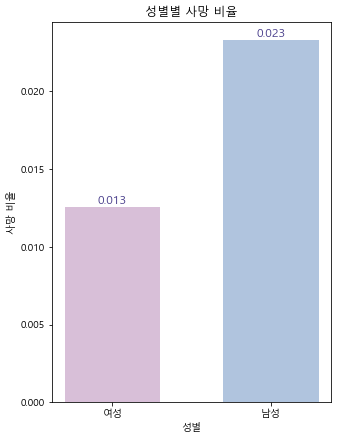

In [48]:
# 성별별 사망 비율
deceased_ratio_sex = deceased_ratio(patients_f, patients_m)
print_plt(sex, deceased_ratio_sex, '사망 비율')

# 시각화
plt.figure(figsize = (5, 7))

plt.bar(sex, deceased_ratio_sex, width=0.6, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(sex):
    plt.text(v, deceased_ratio_sex[i], round(deceased_ratio_sex[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('성별')
plt.ylabel('사망 비율')
plt.title('성별별 사망 비율')

plt.show()

여성 격리 해제 비율 : 0.43740937651039147
남성 격리 해제 비율 : 0.3911525029103609


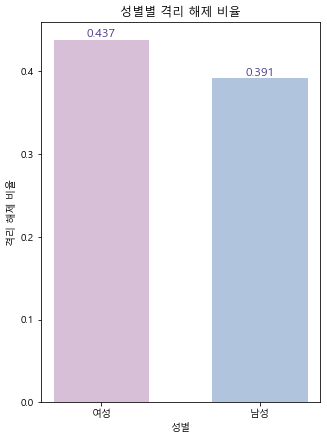

In [49]:
# 성별별 격리 해제 비율
released_ratio_sex = released_ratio(patients_f, patients_m)
print_plt(sex, released_ratio_sex, '격리 해제 비율')

# 시각화
plt.figure(figsize = (5, 7))

plt.bar(sex, released_ratio_sex, width=0.6, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(sex):
    plt.text(v, released_ratio_sex[i], round(released_ratio_sex[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('성별')
plt.ylabel('격리 해제 비율')
plt.title('성별별 격리 해제 비율')

plt.show()

## 지역

In [50]:
# 지역
patient_info['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Gyeonggi-do', 'Sejong', 'Ulsan', 'Gangwon-do', 'Chungcheong-do',
       'Jeolla-do', 'Gyeongsang-do', 'Jeju-do'], dtype=object)

In [51]:
region = patient_info['province'].unique()
patients_regions = [patient_info[patient_info['province'] == r] for r in region]

Seoul 환자 수 : 715
Busan 환자 수 : 149
Daegu 환자 수 : 137
Gwangju 환자 수 : 44
Incheon 환자 수 : 97
Daejeon 환자 수 : 119
Gyeonggi-do 환자 수 : 830
Sejong 환자 수 : 51
Ulsan 환자 수 : 53
Gangwon-do 환자 수 : 61
Chungcheong-do 환자 수 : 224
Jeolla-do 환자 수 : 51
Gyeongsang-do 환자 수 : 1375
Jeju-do 환자 수 : 15


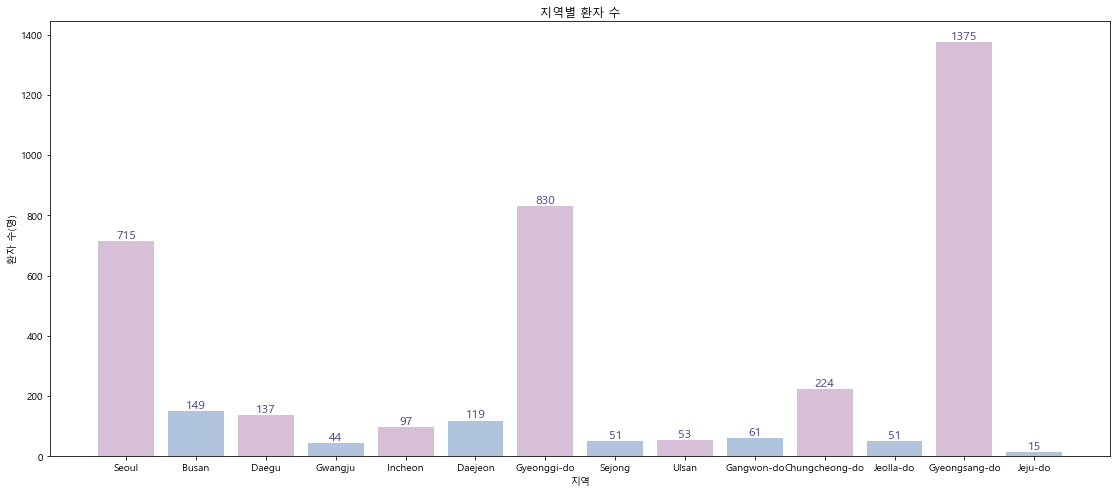

In [52]:
# 지역별 환자 수
patients_region = patients(*patients_regions)
print_plt(region, patients_region, '환자 수')

# 시각화
plt.figure(figsize = (19, 8))

plt.bar(region, patients_region, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(region):
    plt.text(v, patients_region[i], patients_region[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('환자 수(명)')
plt.title('지역별 환자 수')

plt.show()

Seoul 사망 환자 수 : 0
Busan 사망 환자 수 : 0
Daegu 사망 환자 수 : 20
Gwangju 사망 환자 수 : 0
Incheon 사망 환자 수 : 0
Daejeon 사망 환자 수 : 1
Gyeonggi-do 사망 환자 수 : 1
Sejong 사망 환자 수 : 0
Ulsan 사망 환자 수 : 1
Gangwon-do 사망 환자 수 : 3
Chungcheong-do 사망 환자 수 : 0
Jeolla-do 사망 환자 수 : 0
Gyeongsang-do 사망 환자 수 : 40
Jeju-do 사망 환자 수 : 0


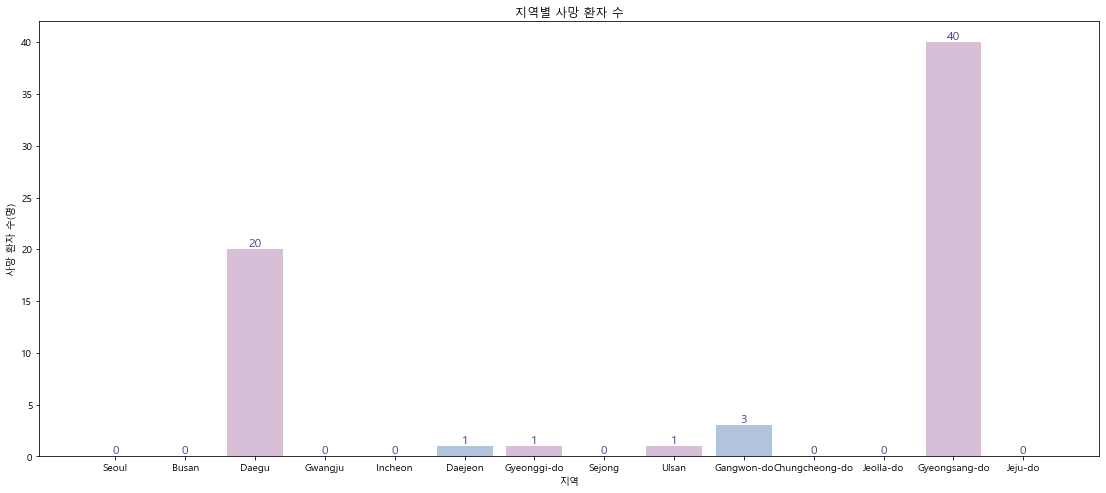

In [53]:
# 지역별 사망 환자 수
deceased_region = deceased(*patients_regions)
print_plt(region, deceased_region, '사망 환자 수')

# 시각화
plt.figure(figsize = (19, 8))

plt.bar(region, deceased_region, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(region):
    plt.text(v, deceased_region[i], deceased_region[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('사망 환자 수(명)')
plt.title('지역별 사망 환자 수')

plt.show()

Seoul 격리 해제 환자 수 : 54
Busan 격리 해제 환자 수 : 0
Daegu 격리 해제 환자 수 : 4
Gwangju 격리 해제 환자 수 : 26
Incheon 격리 해제 환자 수 : 91
Daejeon 격리 해제 환자 수 : 44
Gyeonggi-do 격리 해제 환자 수 : 61
Sejong 격리 해제 환자 수 : 46
Ulsan 격리 해제 환자 수 : 50
Gangwon-do 격리 해제 환자 수 : 26
Chungcheong-do 격리 해제 환자 수 : 200
Jeolla-do 격리 해제 환자 수 : 40
Gyeongsang-do 격리 해제 환자 수 : 920
Jeju-do 격리 해제 환자 수 : 15


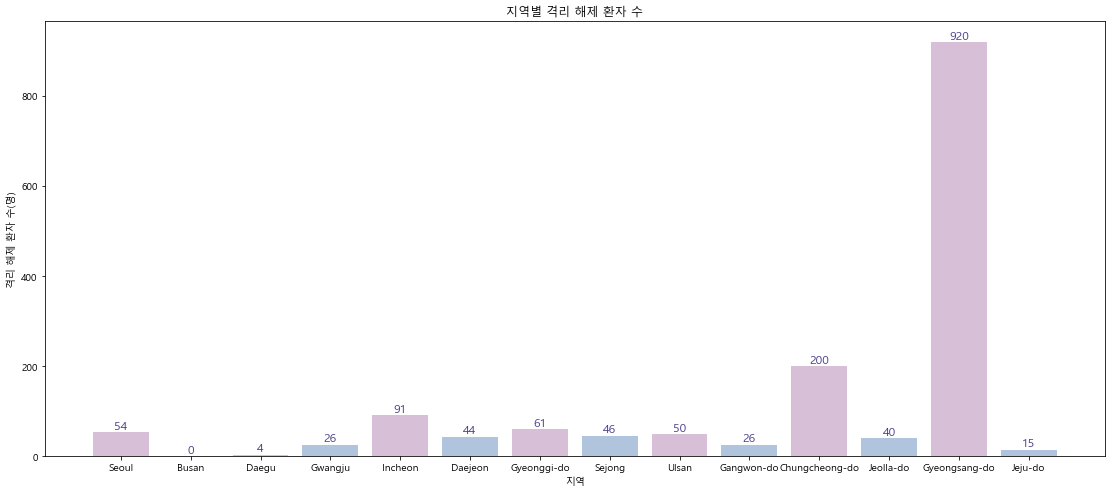

In [54]:
# 지역별 격리 해제 환자 수
released_region = released(*patients_regions)
print_plt(region, released_region, '격리 해제 환자 수')

# 시각화
plt.figure(figsize = (19, 8))

plt.bar(region, released_region, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(region):
    plt.text(v, released_region[i], released_region[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('격리 해제 환자 수(명)')
plt.title('지역별 격리 해제 환자 수')

plt.show()

Seoul 사망 비율 : 0.0
Busan 사망 비율 : 0.0
Daegu 사망 비율 : 0.145985401459854
Gwangju 사망 비율 : 0.0
Incheon 사망 비율 : 0.0
Daejeon 사망 비율 : 0.008403361344537815
Gyeonggi-do 사망 비율 : 0.0012048192771084338
Sejong 사망 비율 : 0.0
Ulsan 사망 비율 : 0.018867924528301886
Gangwon-do 사망 비율 : 0.04918032786885246
Chungcheong-do 사망 비율 : 0.0
Jeolla-do 사망 비율 : 0.0
Gyeongsang-do 사망 비율 : 0.02909090909090909
Jeju-do 사망 비율 : 0.0


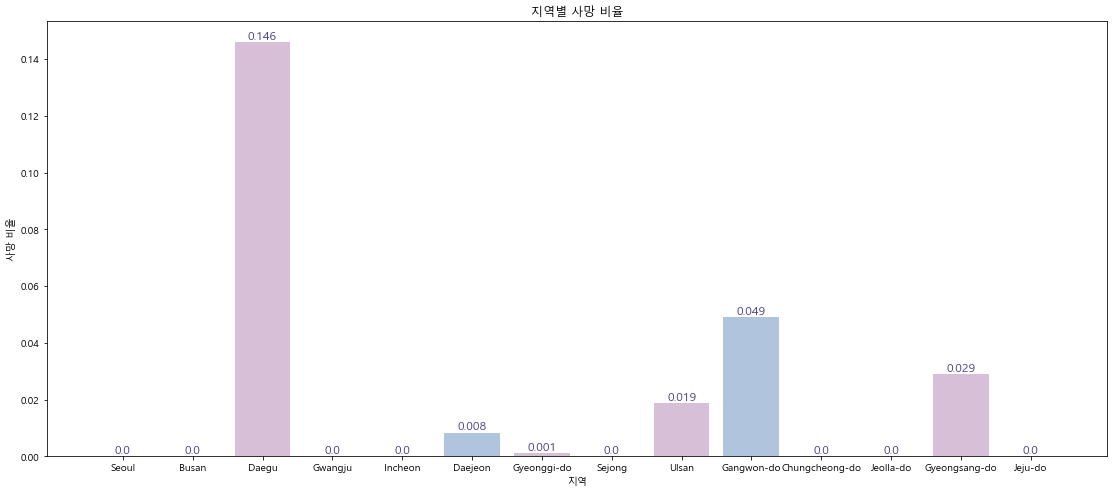

In [55]:
# 지역별 사망 비율
deceased_ratio_region = deceased_ratio(*patients_regions)
print_plt(region, deceased_ratio_region, '사망 비율')

# 시각화
plt.figure(figsize = (19, 8))

plt.bar(region, deceased_ratio_region, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(region):
    plt.text(v, deceased_ratio_region[i], round(deceased_ratio_region[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('사망 비율')
plt.title('지역별 사망 비율')

plt.show()

Seoul 격리 해제 비율 : 0.07552447552447553
Busan 격리 해제 비율 : 0.0
Daegu 격리 해제 비율 : 0.029197080291970802
Gwangju 격리 해제 비율 : 0.5909090909090909
Incheon 격리 해제 비율 : 0.9381443298969072
Daejeon 격리 해제 비율 : 0.3697478991596639
Gyeonggi-do 격리 해제 비율 : 0.07349397590361446
Sejong 격리 해제 비율 : 0.9019607843137255
Ulsan 격리 해제 비율 : 0.9433962264150944
Gangwon-do 격리 해제 비율 : 0.4262295081967213
Chungcheong-do 격리 해제 비율 : 0.8928571428571429
Jeolla-do 격리 해제 비율 : 0.7843137254901961
Gyeongsang-do 격리 해제 비율 : 0.6690909090909091
Jeju-do 격리 해제 비율 : 1.0


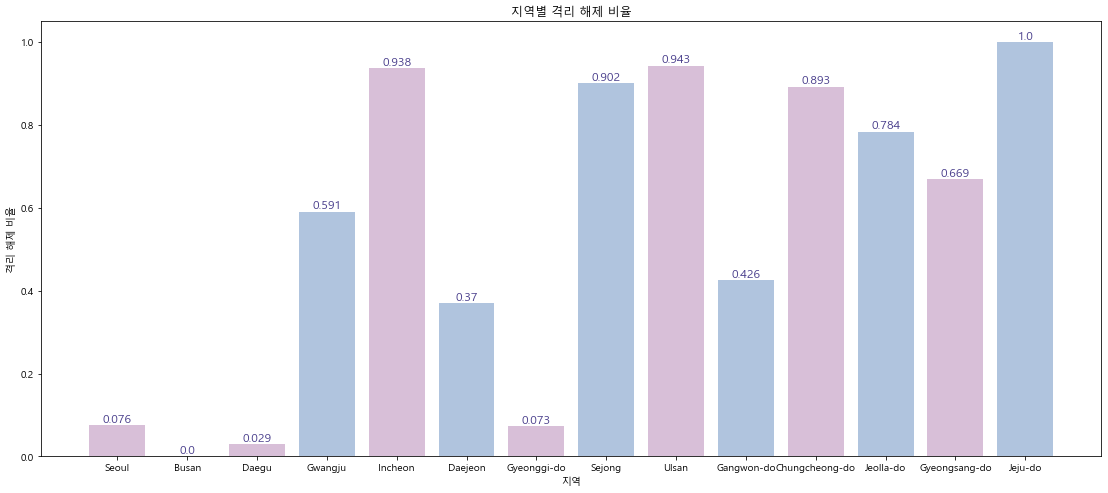

In [56]:
# 지역별 격리 해제 비율
released_ratio_region = released_ratio(*patients_regions)
print_plt(region, released_ratio_region, '격리 해제 비율')

# 시각화
plt.figure(figsize = (19, 8))

plt.bar(region, released_ratio_region, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(region):
    plt.text(v, released_ratio_region[i], round(released_ratio_region[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('격리 해제 비율')
plt.title('지역별 격리 해제 비율')

plt.show()

## 연령

In [57]:
age_level = ['0~19', '20~39', '40~59', '60~79', '80~'] #단위: 세
patients_ages = [patients_1, patients_2, patients_3, patients_4, patients_5]

0~19 환자 수 : 244
20~39 환자 수 : 1563
40~59 환자 수 : 1183
60~79 환자 수 : 711
80~ 환자 수 : 220


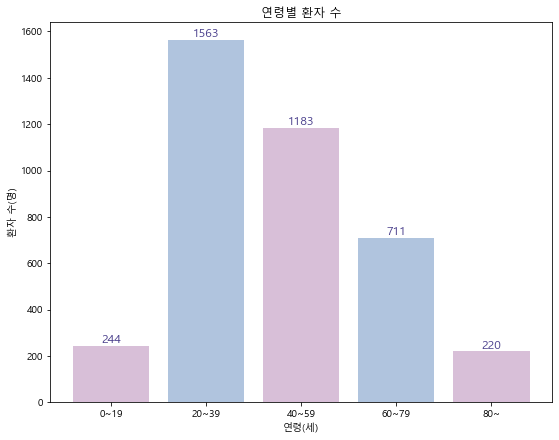

In [58]:
# 연령별 환자 수
patients_age = patients(*patients_ages)
print_plt(age_level, patients_age, '환자 수')

# 시각화
plt.figure(figsize = (9, 7))

plt.bar(age_level, patients_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, patients_age[i], patients_age[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('환자 수(명)')
plt.title('연령별 환자 수')

plt.show()

0~19 사망 환자 수 : 0
20~39 사망 환자 수 : 1
40~59 사망 환자 수 : 7
60~79 사망 환자 수 : 30
80~ 사망 환자 수 : 28


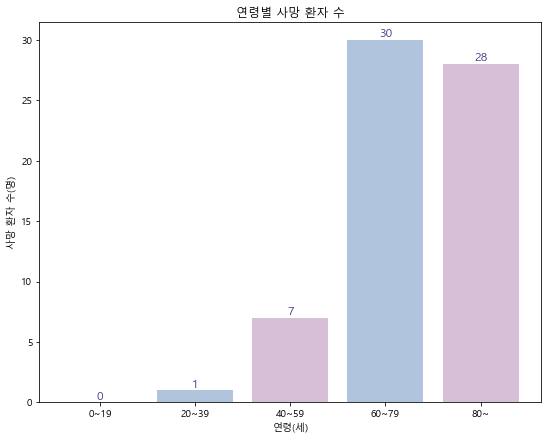

In [59]:
# 연령별 사망 환자 수
deceased_age = deceased(*patients_ages)
print_plt(age_level, deceased_age, '사망 환자 수')

# 시각화
plt.figure(figsize = (9, 7))

plt.bar(age_level, deceased_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, deceased_age[i], deceased_age[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('사망 환자 수(명)')
plt.title('연령별 사망 환자 수')

plt.show()

0~19 격리 해제 환자 수 : 84
20~39 격리 해제 환자 수 : 621
40~59 격리 해제 환자 수 : 541
60~79 격리 해제 환자 수 : 256
80~ 격리 해제 환자 수 : 75


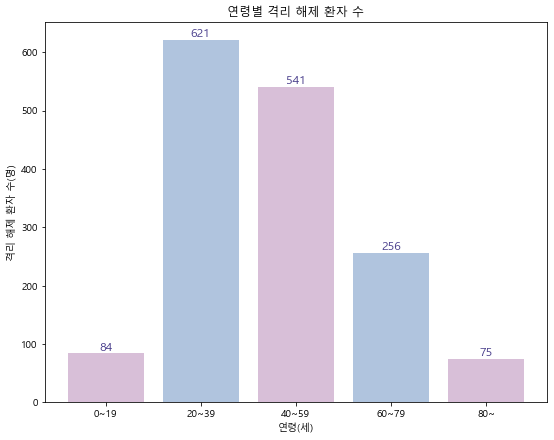

In [60]:
# 연령별 격리 해제 환자 수
released_age = released(*patients_ages)
print_plt(age_level, released_age, '격리 해제 환자 수')

# 시각화
plt.figure(figsize = (9, 7))

plt.bar(age_level, released_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, released_age[i], released_age[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('격리 해제 환자 수(명)')
plt.title('연령별 격리 해제 환자 수')

plt.show()

0~19 사망 비율 : 0.0
20~39 사망 비율 : 0.0006397952655150352
40~59 사망 비율 : 0.005917159763313609
60~79 사망 비율 : 0.04219409282700422
80~ 사망 비율 : 0.12727272727272726


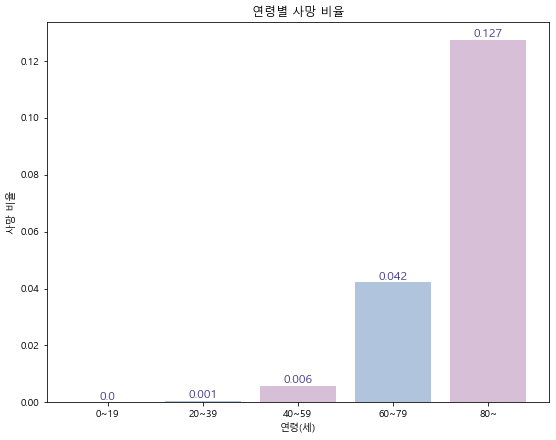

In [61]:
# 연령별 사망 비율
deceased_ratio_age = deceased_ratio(*patients_ages)
print_plt(age_level, deceased_ratio_age, '사망 비율')

# 시각화
plt.figure(figsize = (9, 7))

plt.bar(age_level, deceased_ratio_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, deceased_ratio_age[i], round(deceased_ratio_age[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('사망 비율')
plt.title('연령별 사망 비율')

plt.show()

0~19 격리 해제 비율 : 0.3442622950819672
20~39 격리 해제 비율 : 0.39731285988483683
40~59 격리 해제 비율 : 0.45731191885038036
60~79 격리 해제 비율 : 0.360056258790436
80~ 격리 해제 비율 : 0.3409090909090909


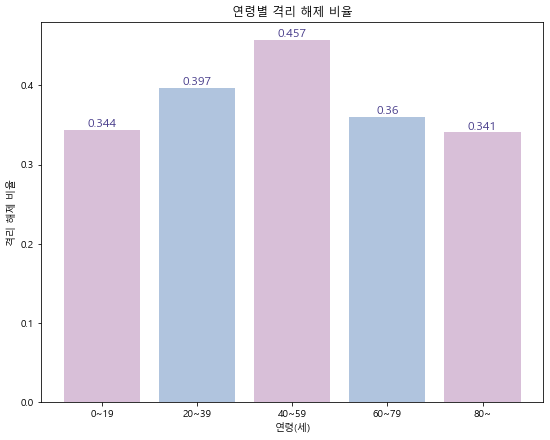

In [62]:
# 연령별 격리 해제 비율
released_ratio_age = released_ratio(*patients_ages)
print_plt(age_level, released_ratio_age, '격리 해제 비율')

# 시각화
plt.figure(figsize = (9, 7))

plt.bar(age_level, released_ratio_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, released_ratio_age[i], round(released_ratio_age[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('격리 해제 비율')
plt.title('연령별 격리 해제 비율')

plt.show()

## 연령, 성별

In [63]:
# age_level = ['0~19', '20~39', '40~59', '60~79', '80~']
# patients_ages = [patients_1, patients_2, patients_3, patients_4, patients_5]
f_a = [pa[pa['sex'] == 'female']['patient_id'].count() for pa in patients_ages]
m_a = [pa[pa['sex'] == 'male']['patient_id'].count() for pa in patients_ages]
print(f_a, m_a)

[96, 701, 710, 414, 148] [148, 729, 472, 297, 72]


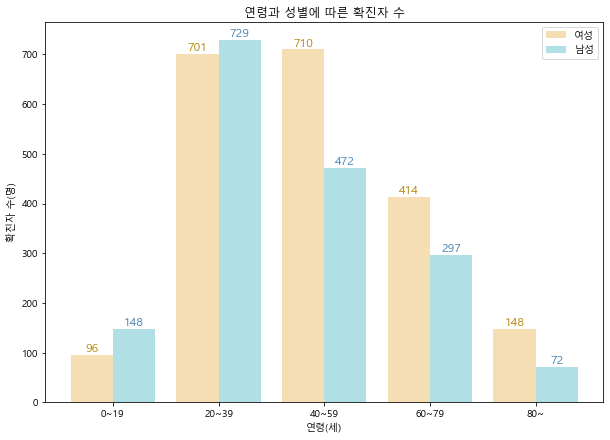

In [64]:
plt.figure(figsize = (10, 7))

x_axis = np.arange(len(age_level))
plt.xticks(x_axis, age_level)

plt.bar(x_axis-0.2, f_a, width=0.4, label = '여성', color='wheat')
plt.bar(x_axis+0.2, m_a, width=0.4, label = '남성', color='powderblue')

for i, v in enumerate(x_axis):
    plt.text(v-0.2, f_a[i], f_a[i],
             fontsize = 12, 
             color='darkgoldenrod',
             horizontalalignment='center',
             verticalalignment='bottom')
    plt.text(v+0.2, m_a[i], m_a[i],
             fontsize = 12, 
             color='steelblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('확진자 수(명)')
plt.title('연령과 성별에 따른 확진자 수')

plt.legend()
plt.show()

In [65]:
# region = patient_info['province'].unique()
# patients_regions = [patient_info[patient_info['province'] == r] for r in region]
f_r = [pr[pr['sex'] == 'female']['patient_id'].count() for pr in patients_regions]
m_r = [pr[pr['sex'] == 'male']['patient_id'].count() for pr in patients_regions]
print(f_r, m_r)

[312, 70, 73, 25, 52, 65, 431, 22, 24, 28, 140, 18, 798, 11] [272, 79, 64, 19, 45, 54, 399, 28, 29, 33, 83, 33, 576, 4]


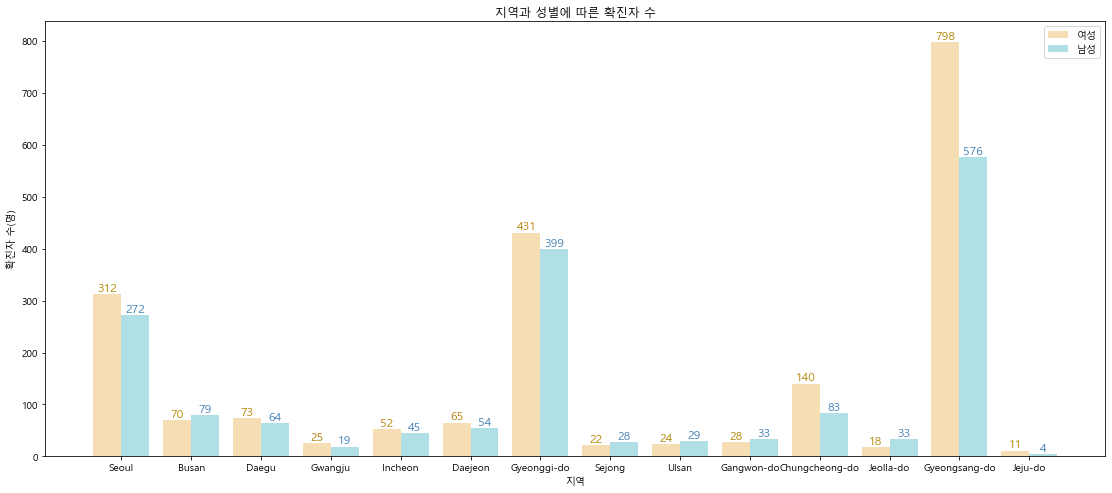

In [66]:
plt.figure(figsize = (19, 8))

x_axis = np.arange(len(region))
plt.xticks(x_axis, region)

plt.bar(x_axis-0.2, f_r, width=0.4, label = '여성', color='wheat')
plt.bar(x_axis+0.2, m_r, width=0.4, label = '남성', color='powderblue')

for i, v in enumerate(x_axis):
    plt.text(v-0.2, f_r[i], f_r[i],
             fontsize = 12, 
             color='darkgoldenrod',
             horizontalalignment='center',
             verticalalignment='bottom')
    plt.text(v+0.2, m_r[i], m_r[i],
             fontsize = 12, 
             color='steelblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('확진자 수(명)')
plt.title('지역과 성별에 따른 확진자 수')

plt.legend()
plt.show()

## 지역, 연령

In [67]:
# age_level = ['0~19', '20~39', '40~59', '60~79', '80~']
# patients_ages = [patients_1, patients_2, patients_3, patients_4, patients_5]
# region = patient_info['province'].unique()
# patients_regions = [patient_info[patient_info['province'] == r] for r in region]
al_r = [[pr[pr['age_level'] == i]['patient_id'].count() for pr in patients_regions] for i in range(1, len(age_level)+1)]
print(al_r)

[[35, 19, 12, 3, 2, 9, 45, 3, 2, 1, 25, 3, 83, 2], [401, 68, 38, 22, 41, 28, 352, 10, 27, 23, 69, 23, 450, 11], [197, 32, 42, 6, 36, 39, 253, 37, 18, 19, 90, 11, 401, 2], [70, 26, 34, 12, 17, 39, 143, 1, 6, 15, 35, 13, 300, 0], [12, 4, 11, 1, 1, 4, 37, 0, 0, 3, 5, 1, 141, 0]]


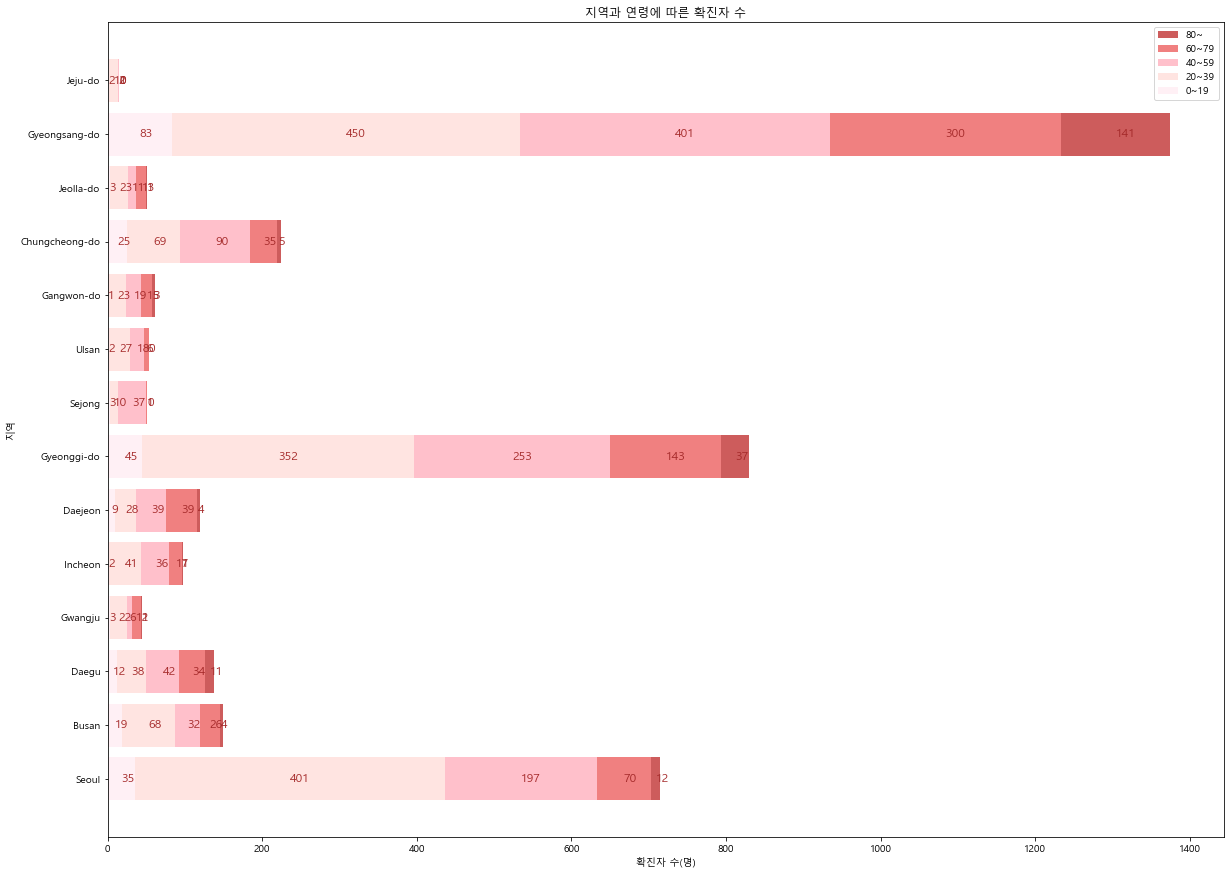

In [94]:
plt.figure(figsize = (20, 15))

plt.barh(region, al_r[4], left=np.sum(al_r[:4], axis=0), label=age_level[4], color='indianred')
plt.barh(region, al_r[3], left=np.sum(al_r[:3], axis=0), label=age_level[3], color='lightcoral')
plt.barh(region, al_r[2], left=np.sum(al_r[:2], axis=0), label=age_level[2], color='pink')
plt.barh(region, al_r[1], left=np.sum(al_r[:1], axis=0), label=age_level[1], color='mistyrose')
plt.barh(region, al_r[0], label=age_level[0], color='lavenderblush')


n = np.array([np.sum(al_r[:j], axis=0) for j in range(1, len(al_r)+1)])

for k in range(len(n)):
    for i, v in enumerate(n[k]):
        plt.text(v-al_r[k][i]/2, i, al_r[k][i],
                 fontsize = 12, 
                 color='brown',
                 horizontalalignment='left',
                 verticalalignment='center')

plt.xlabel('확진자 수(명)')
plt.ylabel('지역')
plt.title('지역과 연령에 따른 확진자 수')
    
plt.legend()
plt.show()

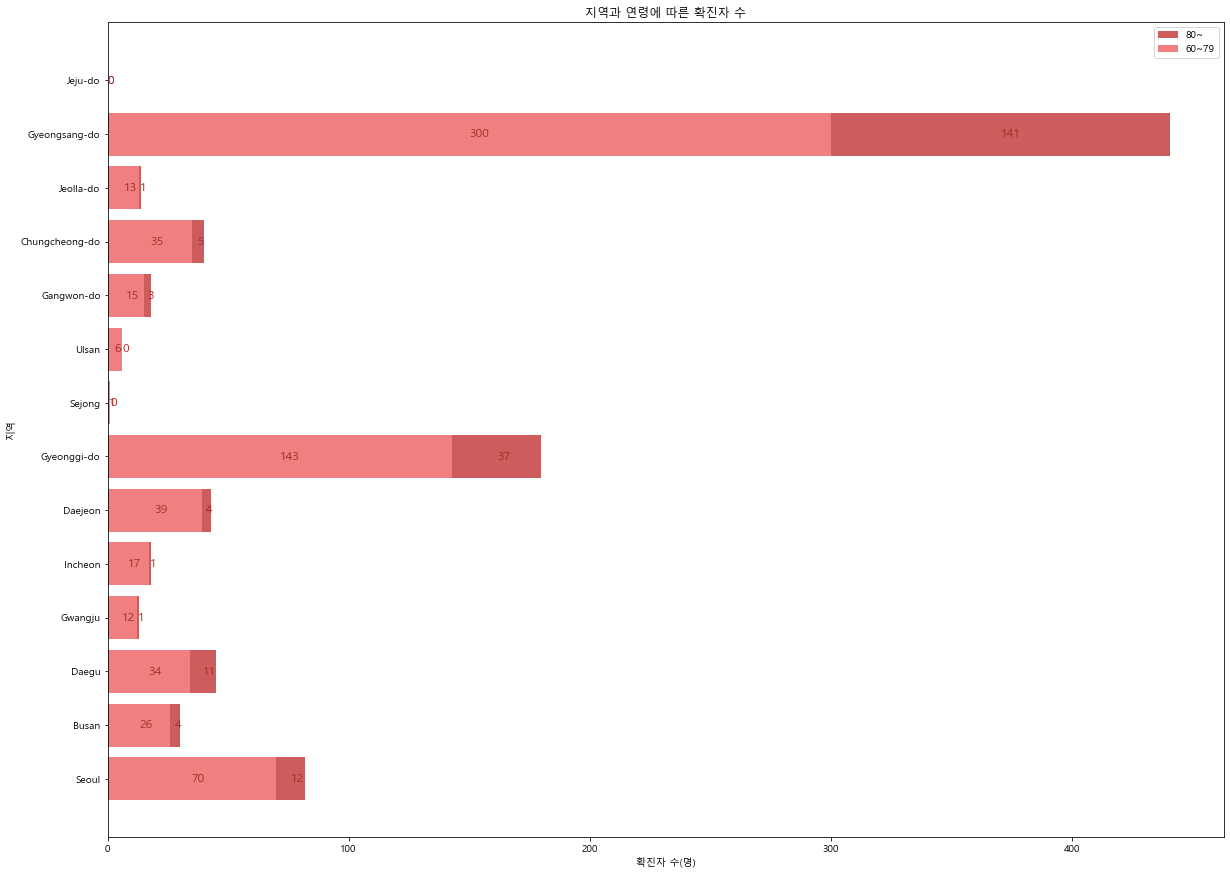

In [108]:
plt.figure(figsize = (20, 15))

plt.barh(region, al_r[4], left=al_r[3], label=age_level[4], color='indianred')
plt.barh(region, al_r[3], label=age_level[3], color='lightcoral')


n = np.array([np.sum(al_r[:j], axis=0) for j in range(1, len(al_r)+1)])

for k in range(3, len(n)):
    for i, v in enumerate(n[k]):
        plt.text(v-n[2][i]-al_r[k][i]/2, i, al_r[k][i],
                 fontsize = 12, 
                 color='brown',
                 horizontalalignment='left',
                 verticalalignment='center')

plt.xlabel('확진자 수(명)')
plt.ylabel('지역')
plt.title('지역과 연령에 따른 확진자 수')
    
plt.legend()
plt.show()

# 정책 데이터

In [70]:
policy = pd.read_csv('data/Policy.csv')

In [71]:
policy

,policy_id,type,gov_policy,detail,start_date,end_date
0,1,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...
56,57,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


In [72]:
policy.groupby(['type', 'gov_policy', 'detail']).count()

policy_id  \
type           gov_policy                                    detail                                                          
Administrative Close bars and clubs                          administrative order to close bars and clubs                1   
               Close karaoke                                 Ban on gathering for 2 weeks for all karaoke an...          1   
               local government Administrative orders        Gathering limited administrative orders for nur...          1   
Alert          Infectious Disease Alert Level                Level 1 (Blue)                                              1   
                                                             Level 2 (Yellow)                                            1   
                                                             Level 3 (Orange)                                            1   
                                                             Level 4 (Red)                                               1   
Education      School Closure                                Daycare Center for Children                                 1   
               School Opening Delay                          Elementary School                                           1   
                                                             High School                                                 1   
                                                             Kindergarten                                                1   
                                                             Middle School                                               1   
               School Opening with Online Class              Elementary School (1st ~ 2nd grade)                         1   
                                                             Elementary School (3rd grade)                               1   
                                                             Elementary School (4th grade)                               1   
                                                             Elementary School (5th ~ 6th grade)                         1   
                                                             High School (1st grade)                                     1   
                                                             High School (2nd grade)                                     1   
                                                             High School (3rd grade)                                     1   
                                                             Middle School (1st grade)                                   1   
                                                             Middle School (2nd grade)                                   1   
                                                             Middle School (3rd grade)                                   1   
Health         Drive-Through Screening Center                Standard Operating Procedures                               1   
                                                             by Local Government                                         1   
               Emergency Use Authorization of Diagnostic Kit 1st EUA                                                     1   
                                                             2nd EUA                                                     1   
                                                             3rd EUA                                                     1   
                                                             4th EUA                                                     1   
                                                             5th EUA                                                     1   
               Extends Tightened Quarantine Measures         Gov't Extends Tightened Quarantine Measures in ...          1   
               Mask Distribution                             5-day Rotation Syste

In [73]:
def date_range(start, end):
    start = datetime.strptime(start, "%Y-%m-%d")
    end = datetime.strptime(end, "%Y-%m-%d")
    dates = [date.strftime("%Y-%m-%d") for date in pd.date_range(start, periods=(end-start).days+1)]
    return dates
    
d = date_range("2020-01-01", "2020-06-30")

dates = pd.DataFrame(d, columns=['date'])
dates

,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
177,2020-06-26
178,2020-06-27
179,2020-06-28
180,2020-06-29


In [74]:
policy_date = policy[['type', 'gov_policy', 'start_date']]
policy_date

,type,gov_policy,start_date
0,Alert,Infectious Disease Alert Level,2020-01-03
1,Alert,Infectious Disease Alert Level,2020-01-20
2,Alert,Infectious Disease Alert Level,2020-01-28
3,Alert,Infectious Disease Alert Level,2020-02-23
4,Immigration,Special Immigration Procedure,2020-02-04
...,...,...,...
56,Transformation,Logistics center,2020-05-29
57,Transformation,Wearing of masks,2020-05-27
58,Transformation,Wearing of masks,2020-05-26
59,Technology,KI-Pass: Korea Internet - Pass,2020-06-10


In [75]:
patients_date = patient_info.groupby('confirmed_date')[['patient_id']].count().reset_index()
patients_date.rename(columns={'patient_id':'patient_count'}, inplace=True)
patients_date

,confirmed_date,patient_count
0,2020-01-20,1
1,2020-01-23,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,4
...,...,...
141,2020-06-26,4
142,2020-06-27,17
143,2020-06-28,13
144,2020-06-29,9


In [76]:
m1 = pd.merge(dates, patients_date, how='left', left_on='date', right_on='confirmed_date')[['date', 'patient_count']]
m1['patient_count'] = m1['patient_count'].fillna(0)
m1

,date,patient_count
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0
...,...,...
177,2020-06-26,4.0
178,2020-06-27,17.0
179,2020-06-28,13.0
180,2020-06-29,9.0


In [77]:
m2 = pd.merge(policy_date, patients_date, how='left', left_on='start_date', right_on='confirmed_date')
m2 = m2[['start_date', 'type', 'gov_policy', 'patient_count']]
m2['patient_count'] = m2['patient_count'].fillna(0)
m2

,start_date,type,gov_policy,patient_count
0,2020-01-03,Alert,Infectious Disease Alert Level,0.0
1,2020-01-20,Alert,Infectious Disease Alert Level,1.0
2,2020-01-28,Alert,Infectious Disease Alert Level,0.0
3,2020-02-23,Alert,Infectious Disease Alert Level,75.0
4,2020-02-04,Immigration,Special Immigration Procedure,0.0
...,...,...,...,...
56,2020-05-29,Transformation,Logistics center,21.0
57,2020-05-27,Transformation,Wearing of masks,29.0
58,2020-05-26,Transformation,Wearing of masks,18.0
59,2020-06-10,Technology,KI-Pass: Korea Internet - Pass,0.0


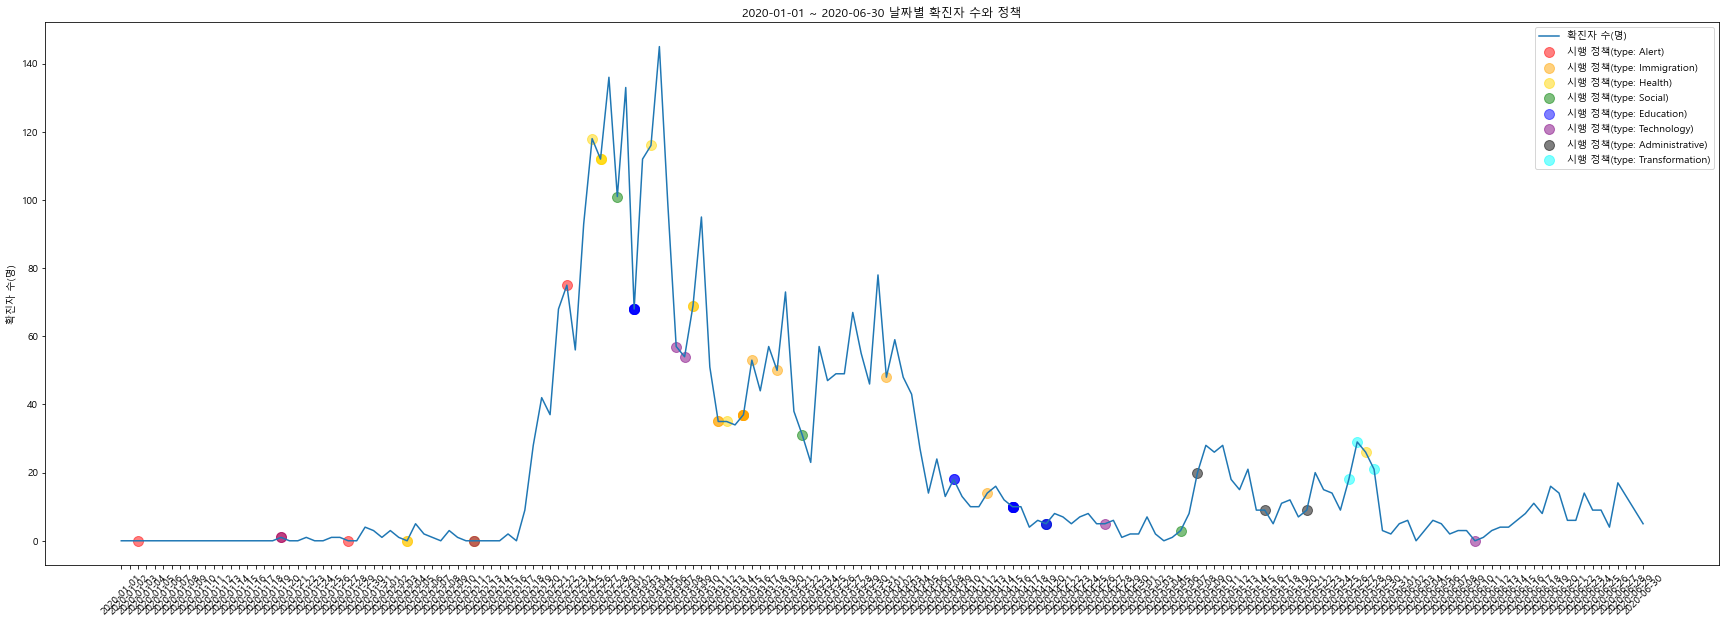

In [78]:
plt.figure(figsize=(30, 10))

plt.plot(m1['date'], m1['patient_count'], label='확진자 수(명)')

some_list = []
#plt.scatter(m2['start_date'], m2['patient_count'])
for r in m2.values:
    if r[1] == 'Alert':
        plt.scatter(r[0], r[3], color='red', alpha=0.5, s=100,
                    label='시행 정책(type: Alert)' if 'Alert' not in some_list else '')
        if 'Alert' not in some_list: some_list.append('Alert')
        
    elif r[1] == 'Immigration':
        plt.scatter(r[0], r[3], color='orange', alpha=0.5, s=100,
                    label='시행 정책(type: Immigration)' if 'Immigration' not in some_list else '')
        if 'Immigration' not in some_list: some_list.append('Immigration')
        
    elif r[1] == 'Health':
        plt.scatter(r[0], r[3], color='gold', alpha=0.5, s=100,
                    label='시행 정책(type: Health)' if 'Health' not in some_list else '')
        if 'Health' not in some_list: some_list.append('Health')
        
    elif r[1] == 'Social':
        plt.scatter(r[0], r[3], color='green', alpha=0.5, s=100,
                    label='시행 정책(type: Social)' if 'Social' not in some_list else '')
        if 'Social' not in some_list: some_list.append('Social')
        
    elif r[1] == 'Education':
        plt.scatter(r[0], r[3], color='blue', alpha=0.5, s=100,
                    label='시행 정책(type: Education)' if 'Education' not in some_list else '')
        if 'Education' not in some_list: some_list.append('Education')
        
    elif r[1] == 'Technology':
        plt.scatter(r[0], r[3], color='purple', alpha=0.5, s=100,
                    label='시행 정책(type: Technology)' if 'Technology' not in some_list else '')
        if 'Technology' not in some_list: some_list.append('Technology')
        
    elif r[1] == 'Administrative':
        plt.scatter(r[0], r[3], color='black', alpha=0.5, s=100,
                    label='시행 정책(type: Administrative)' if 'Administrative' not in some_list else '')
        if 'Administrative' not in some_list: some_list.append('Administrative')
        
    elif r[1] == 'Transformation':
        plt.scatter(r[0], r[3], color='cyan', alpha=0.5, s=100,
                    label='시행 정책(type: Transformation)' if 'Transformation' not in some_list else '')
        if 'Transformation' not in some_list: some_list.append('Transformation')
        
plt.xticks(rotation = 45)
plt.ylabel('확진자 수(명)')
plt.title('2020-01-01 ~ 2020-06-30 날짜별 확진자 수와 정책')

plt.legend()
plt.show()

In [79]:
types = m2['type'].unique()
types

array(['Alert', 'Immigration', 'Health', 'Social', 'Education',
       'Technology', 'Administrative', 'Transformation'], dtype=object)

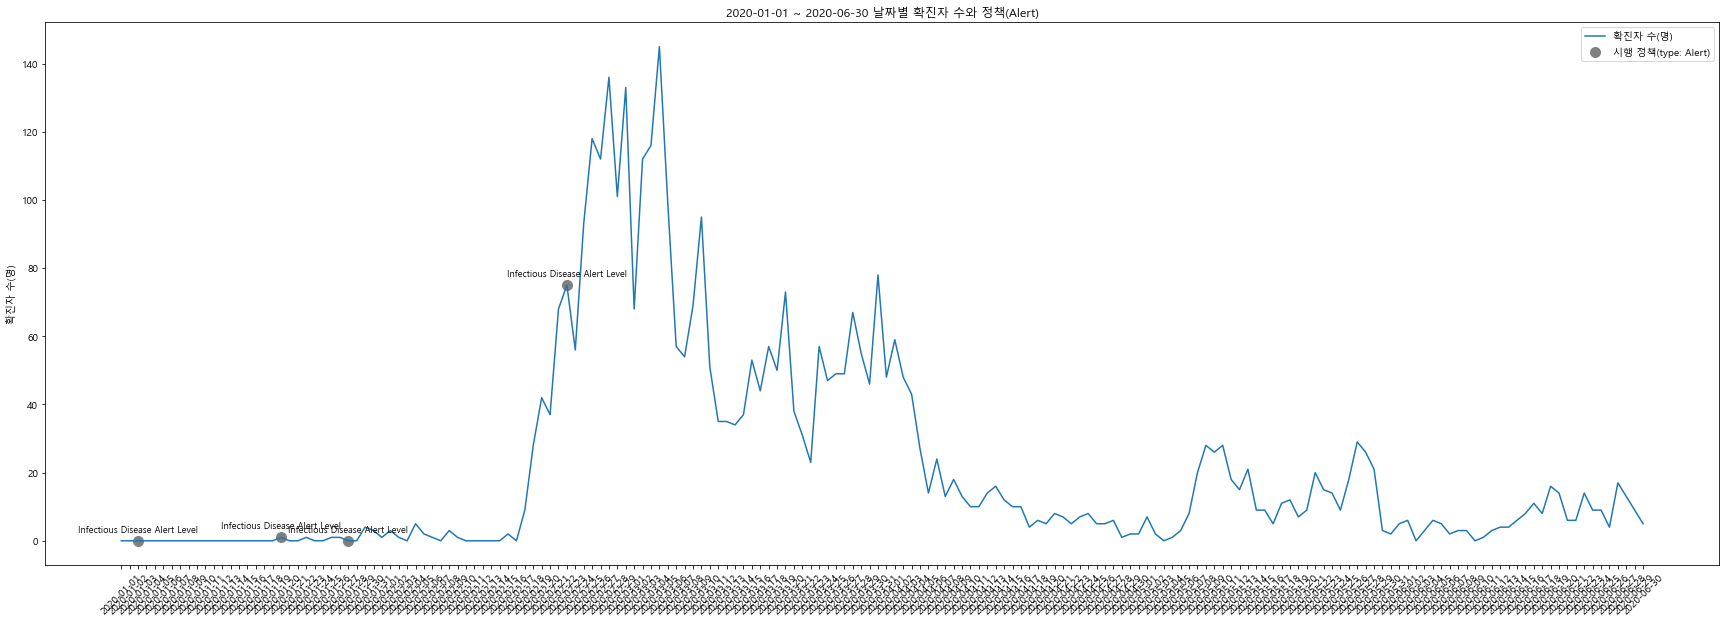

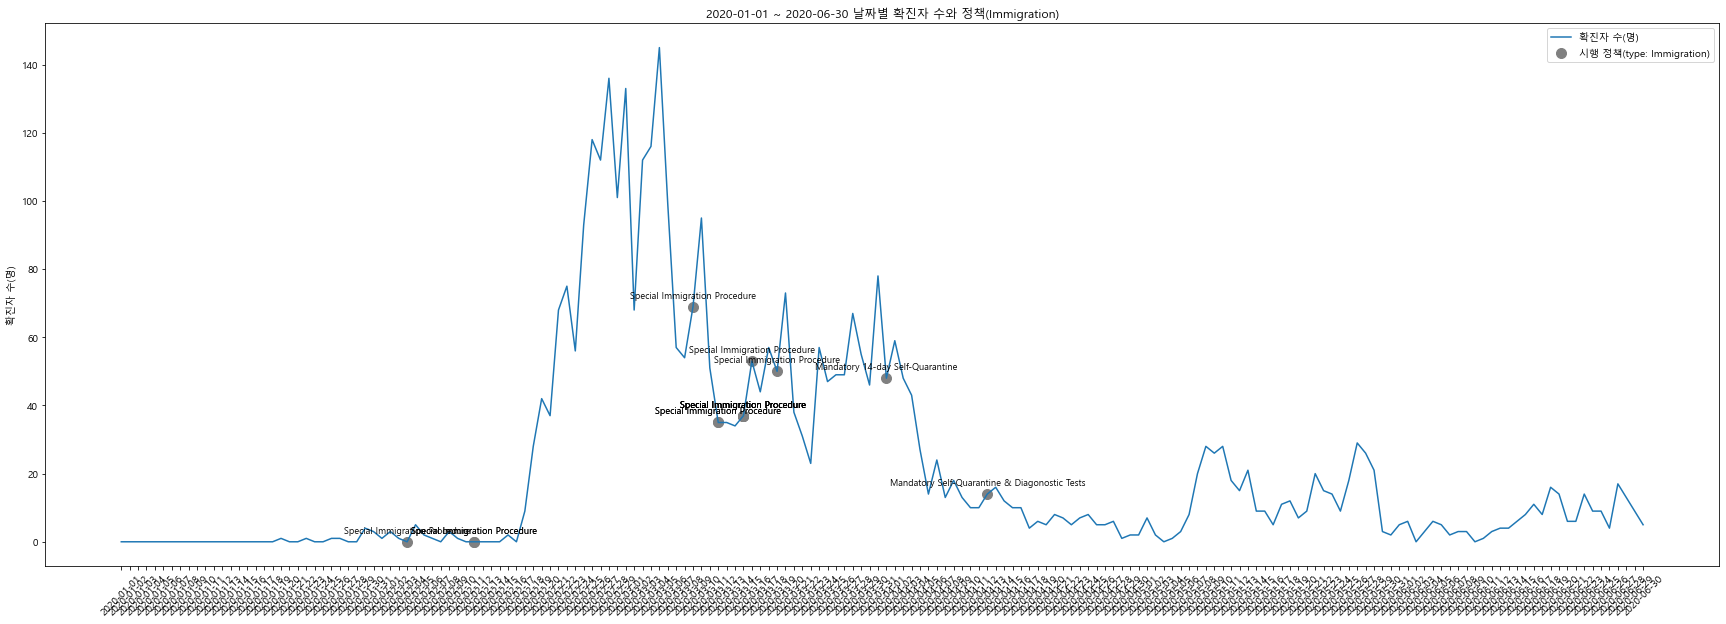

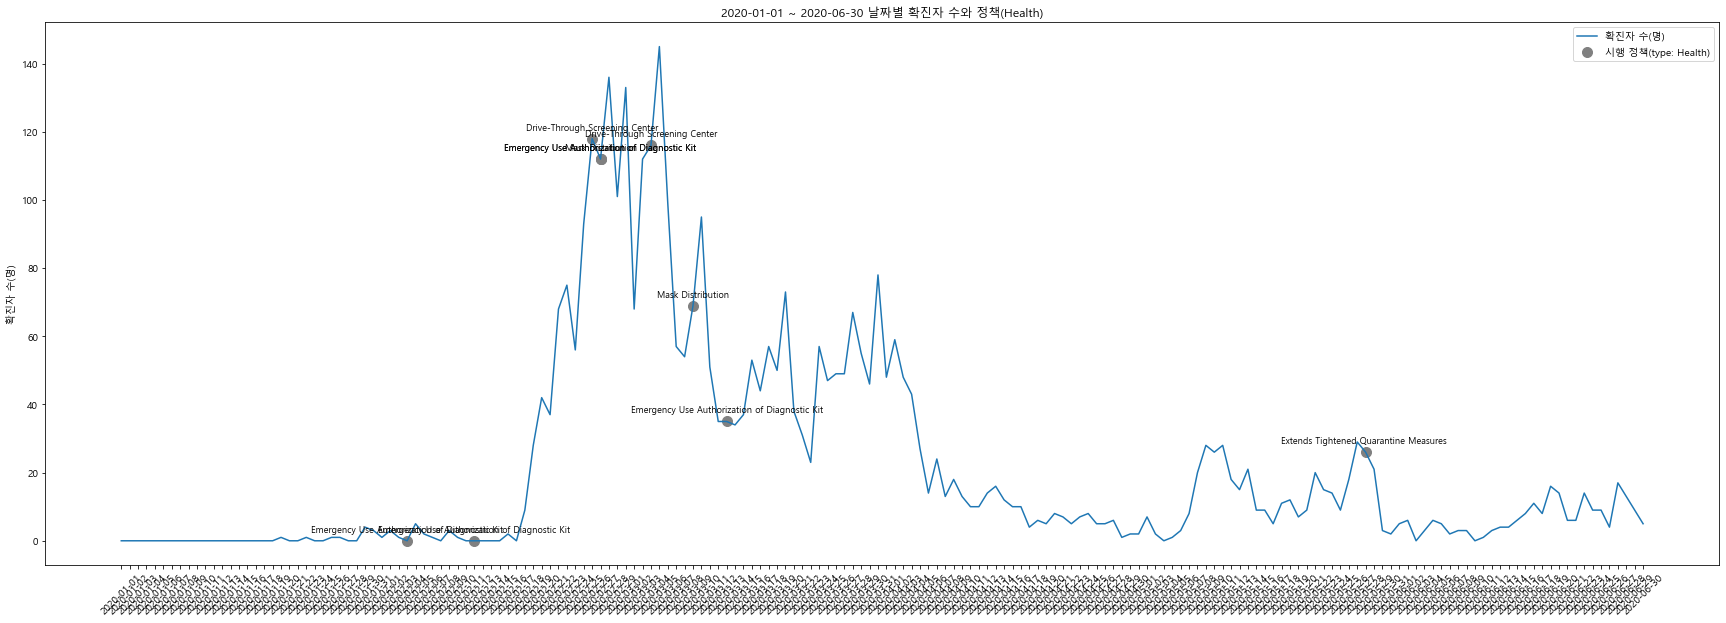

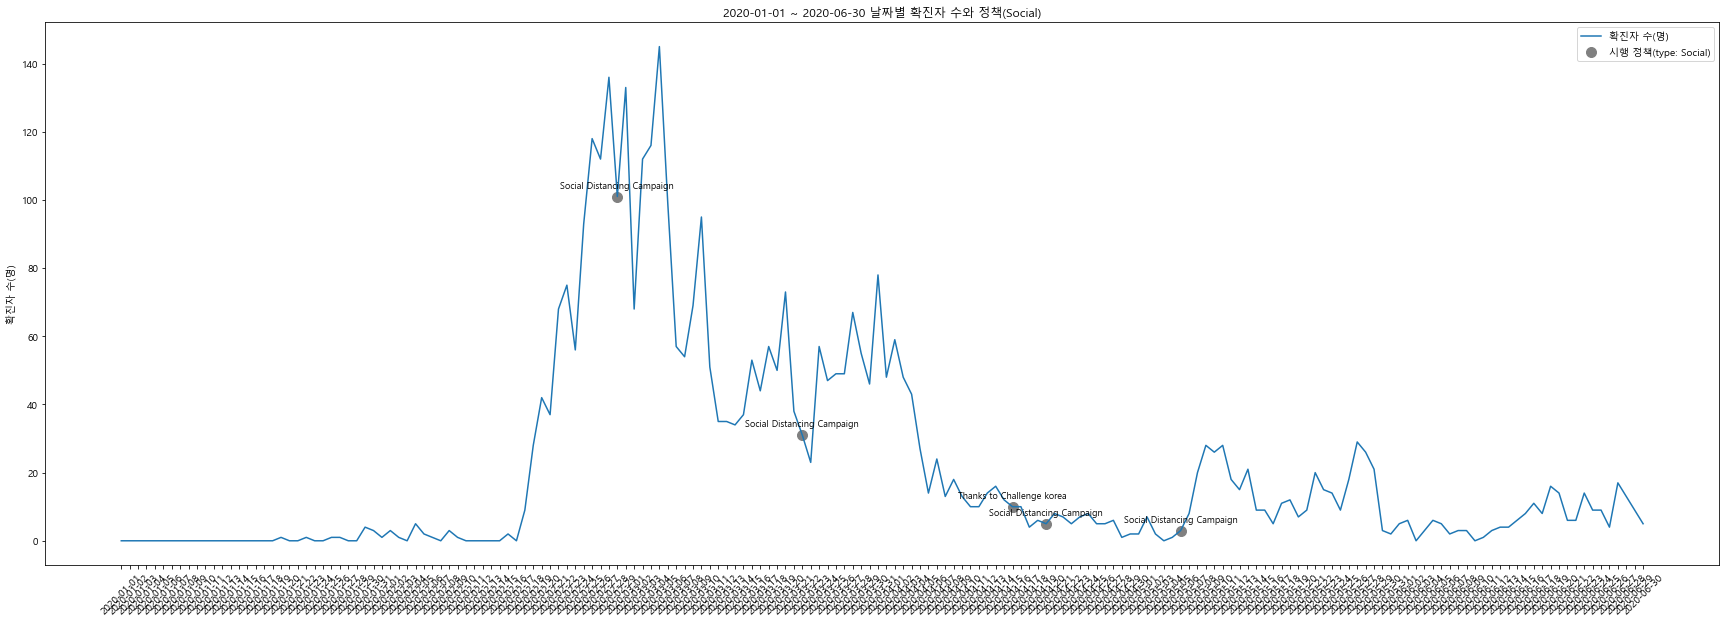

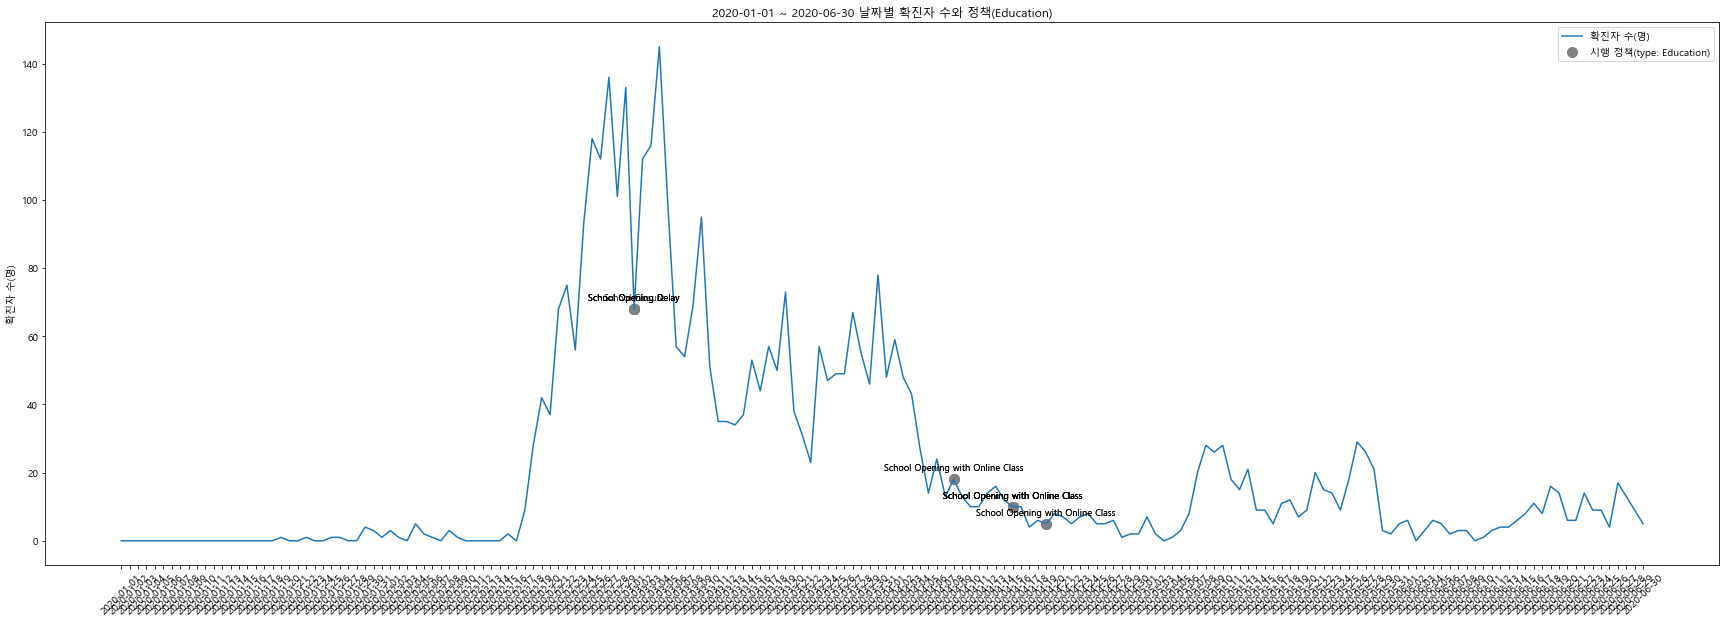

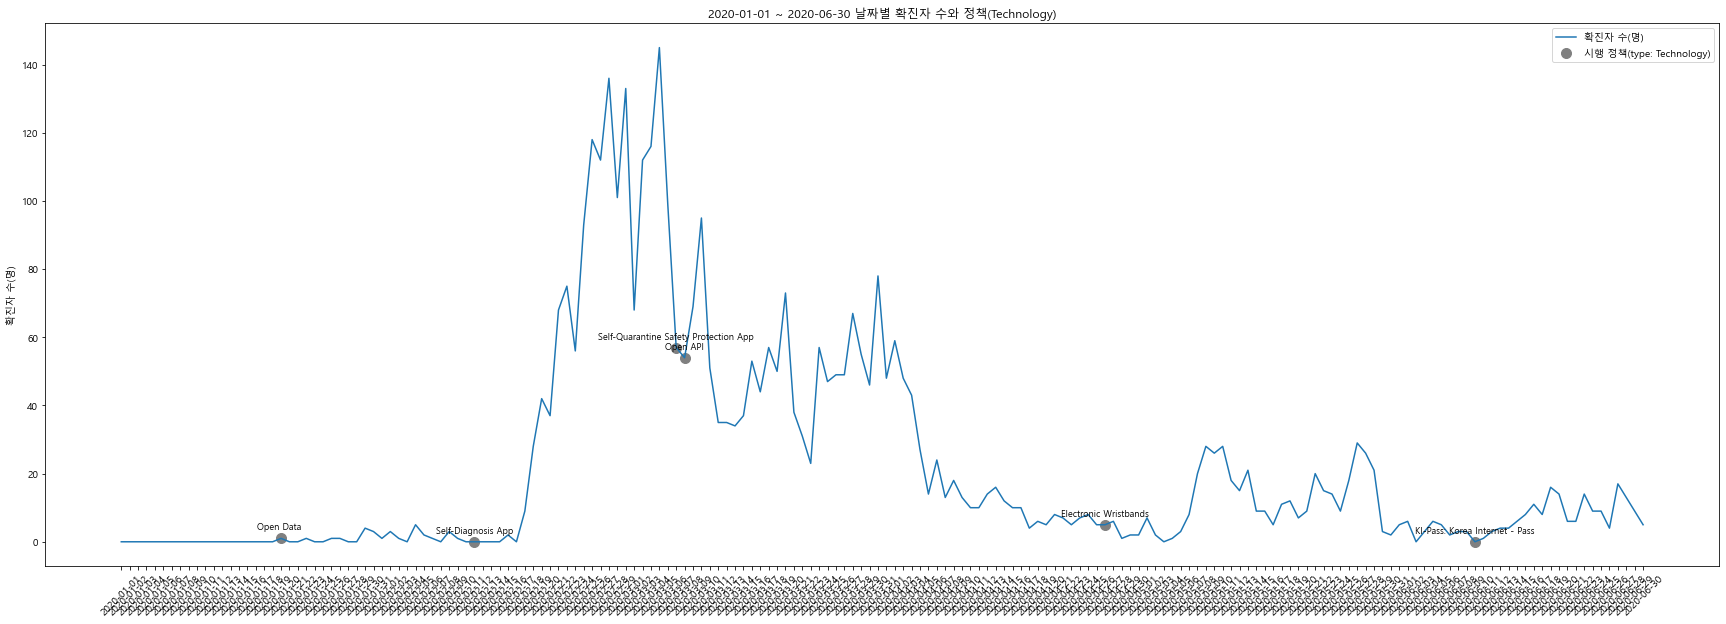

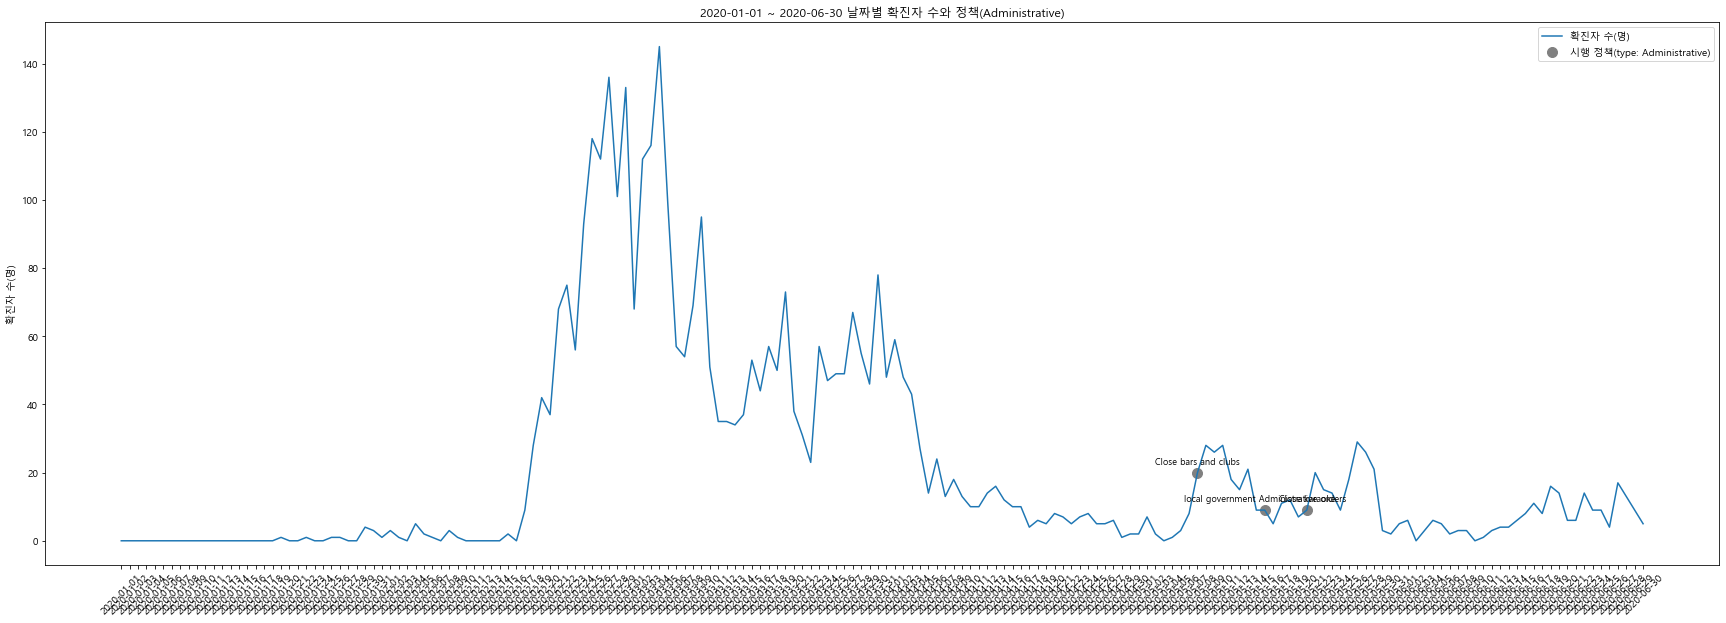

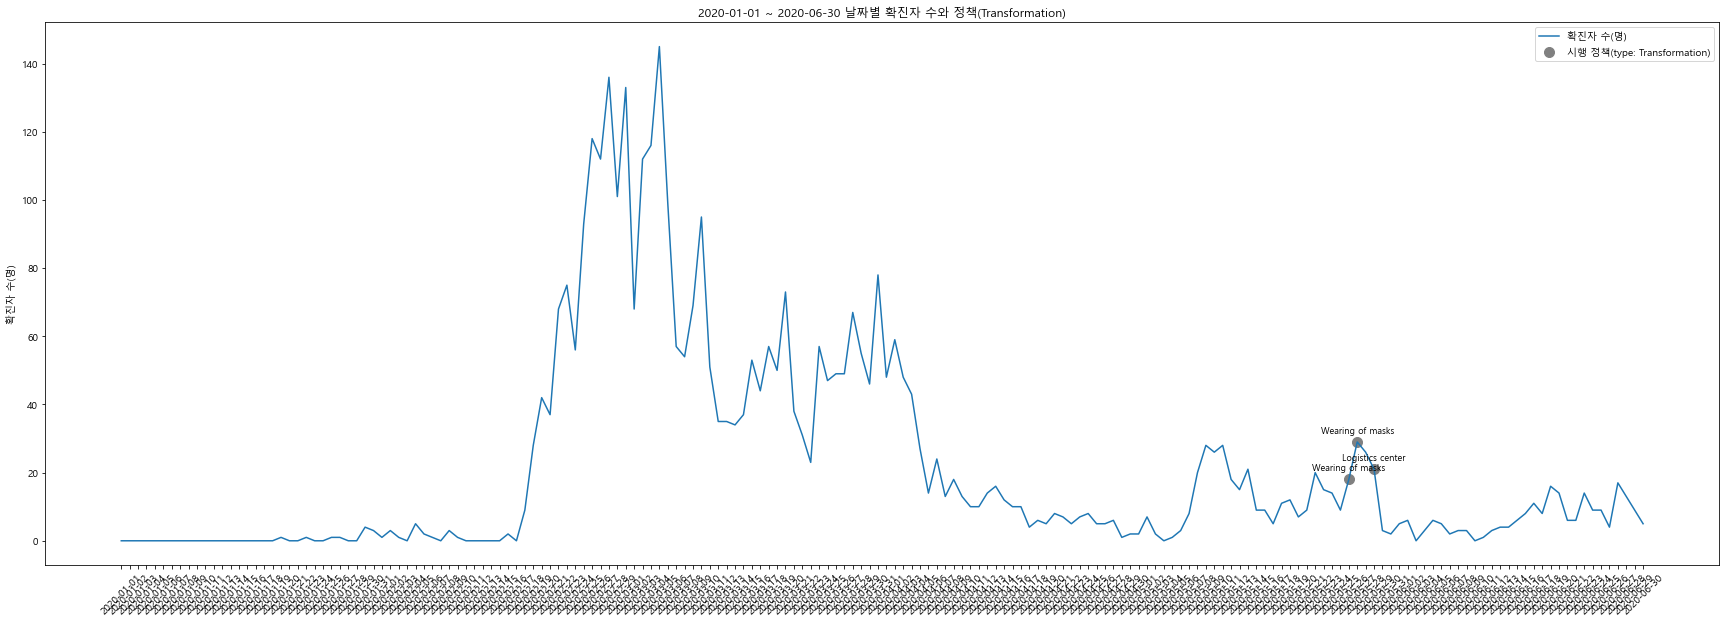

In [80]:
for i in range(len(types)):
    plt.figure(figsize=(30, 10))

    plt.plot(m1['date'], m1['patient_count'], label='확진자 수(명)')
    
    flag = True
    for r in m2.values:
        if r[1] == types[i]:
            plt.scatter(r[0], r[3], color='gray', s=100,
                        label='시행 정책(type: '+types[i]+')' if flag else '')
            flag = False
            
            plt.text(r[0], r[3]+2, r[2],
                     fontsize = 9, 
                     color='black',
                     horizontalalignment='center',
                     verticalalignment='bottom')

    plt.xticks(rotation = 45)
    plt.ylabel('확진자 수(명)')
    plt.title('2020-01-01 ~ 2020-06-30 날짜별 확진자 수와 정책('+types[i]+')')
    
    plt.legend()
    plt.show()